<a href="https://colab.research.google.com/github/ARPITA1312/Cervical-Cancer-detection-using-CNN-Models/blob/main/Combined_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Q-Net

In [4]:
!pip install torch torchvision
!pip install torch torchvision pennylane pennylane-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [9]:
import os
import cv2
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Define your path to the dataset in Google Drive
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset'

# Define custom dataset
class Sipakmed_Dataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_names = os.listdir(image_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        # Load the image using OpenCV
        image = cv2.imread(img_path)
        if image is None:
            print(f"Error loading image: {img_path}")
            return None
        # Convert the image from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Convert the image to PIL format
        image = Image.fromarray(image)
        if self.transform:
            image = self.transform(image)
        return image

In [18]:
pip install opencv-python


In [19]:
pip install opencv-python-headless


In [20]:
import cv2
print(cv2.__version__)

4.11.0


In [22]:
image = cv2.imread('/content/drive/MyDrive/Sipakmed_Dataset', cv2.IMREAD_COLOR)  # Ensure the image is loaded in color


In [23]:
image = cv2.imread('/content/drive/MyDrive/Sipakmed_Dataset')
print(type(image))  # Should be <class 'numpy.ndarray'>, if None, the image is not loaded.


<class 'NoneType'>


In [25]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (Resize, Convert to Tensor, Normalize)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset using ImageFolder
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset'
dataset = datasets.ImageFolder(root=image_dir, transform=transform)

# Create DataLoader
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check sample output
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break


torch.Size([32, 3, 64, 64]) torch.Size([32])


In [27]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (Resize, Convert to Tensor, Normalize)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset using ImageFolder
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset'
dataset = datasets.ImageFolder(root=image_dir, transform=transform)

# **Check the number of classes in your dataset:**
num_classes = len(dataset.classes)
print(f"Number of classes detected: {num_classes}")
print(f"Class names: {dataset.classes}")

# **If num_classes is not 2, adjust your model's final layer:**
# In your HybridCNN class, change the following line:
# self.fc2 = nn.Linear(n_qubits, 2)
# to:
# self.fc2 = nn.Linear(n_qubits, num_classes)

# Create DataLoader
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check sample output
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

Number of classes detected: 6
Class names: ['Processed_Test', 'Processed_Training', 'Processed_with_edges_Test', 'Processed_with_edges_Training', 'Test', 'Training']
torch.Size([32, 3, 64, 64]) torch.Size([32])


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset'
dataset = datasets.ImageFolder(root=image_dir, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Get the number of classes in the dataset
num_classes = len(dataset.classes)
print(f"Number of classes: {num_classes}")

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes): # Pass num_classes as an argument
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 32 * 32, num_classes)  # Use num_classes here

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        return x

# Initialize model, loss function, optimizer
model = SimpleCNN(num_classes=num_classes) # Pass num_classes to the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with loss tracking
num_epochs = 2
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        epoch_loss += loss.item()  # Accumulate loss

    avg_loss = epoch_loss / len(train_loader)  # Compute average loss for epoch

    # Print loss for epoch 1 and epoch 2
    if epoch in [0, 1]:
        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}")

Number of classes: 6
Epoch 1: Loss = 0.8754
Epoch 2: Loss = 0.7107




U-Net is a type of convolutional neural network designed primarily for image segmentation tasks, where the goal is to classify each pixel of an image into a specific class. This is a supervised learning task, which means the model learns from labeled data. The masked images serve as the labels.

During training, the U-Net model takes an input image and tries to predict a segmentation mask. The ground truth masks (stored in the masked images directory) are used to compare the predicted masks with the actual masks. This comparison is typically done using a loss function, such as cross-entropy loss or dice coefficient loss, which quantifies the difference between the predicted mask and the ground truth mask.

The loss calculated from the difference between the predicted and ground truth masks is used to optimize the model's parameters. The process of backpropagation updates the model weights to minimize this loss, improving the accuracy of the segmentation over time.


In [47]:
#In a U-Net model, a masked images directory is created to store the ground truth masks corresponding to the input images.
#Creating a new folder for masked image directory
import os

# Define the new directory path
new_dir = '/content/drive/MyDrive/Sipakmed-models-and-masks'
# Create the new directory
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

print(f"Directory {new_dir} created successfully.")

Directory /content/drive/MyDrive/Sipakmed-models-and-masks created successfully.


In [52]:
import os
print(os.path.exists('/content/drive/MyDrive/Sipakmed_Dataset'))  # Should return True if the directory exists


True


In [53]:
files = os.listdir(image_dir)
print("Files in directory:", files)


Files in directory: ['Test', 'Training', 'Processed_Training', 'Processed_Test', 'Processed_with_edges_Training', 'Processed_with_edges_Test']


In [54]:
import cv2
test_img = cv2.imread(os.path.join(image_dir, files[0]))
print(test_img is None)  # If True, the image is unreadable


True


In [62]:
#Loading and preprocessing the original images to create masked grayscale images for ground truth based on the threshold value.

import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Function to load images from a folder
def load_images_from_folder(folder, color_mode='rgb'):
    images = []
    for filename in os.listdir(folder):
        # Check if the item is a file before processing
        if os.path.isfile(os.path.join(folder, filename)):
            img = load_img(os.path.join(folder, filename), color_mode=color_mode)
            if img is not None:
                images.append(img_to_array(img))
    return images

# Preprocess images
def preprocess_image(image, target_size=(256, 256)):
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image

# Directory paths
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset (1)/Processed_Test/im_Dyskeratotic'  # Directory containing the input images
output_mask_dir = '/content/drive/MyDrive/Sipakmed-models-and-masks' # Directory to save the generated masks

# Create output directory if it doesn't exist
if not os.path.exists(output_mask_dir):
    os.makedirs(output_mask_dir)

# Load and preprocess images
images = load_images_from_folder(image_dir, color_mode='rgb')
preprocessed_images = [preprocess_image(img) for img in images]

# Convert to numpy array
X = np.array(preprocessed_images)
print(f'Image shape: {X.shape}')
# Function to create masks by thresholding
def create_mask(image, threshold=0.5):
    # Convert image to grayscale
    gray_image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    # Normalize to [0, 1]
    gray_image = gray_image / 255.0
    # Apply threshold
    mask = (gray_image > threshold).astype(np.float32)
    return mask

# Create and save masks
for i, image in enumerate(X):
    # Create mask
    mask = create_mask(image)

    # Original image path
    original_image_path = os.path.join(image_dir, os.listdir(image_dir)[i])
    original_image = load_img(original_image_path)
    original_size = (original_image.width, original_image.height)

    # Resize mask to original size
    mask = cv2.resize(mask, original_size)
    mask = (mask * 255).astype(np.uint8)  # Convert back to uint8

    # Save mask
    output_path = os.path.join(output_mask_dir, f'mask_{i}.png')
    cv2.imwrite(output_path, mask)

print("Masked grayscale images saved successfully.")

Image shape: (100, 256, 256, 3)
Masked grayscale images saved successfully.


In [64]:
#Training the U-net Segmentation model
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Function to load images from a folder
def load_images_from_folder(folder, color_mode='rgb'):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), color_mode=color_mode)
        if img is not None:
            images.append(img_to_array(img))
    return images

# Preprocess images and masks
def preprocess_image(image, target_size=(256, 256)):
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image

# Directory paths
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset (1)/Processed_Test/im_Dyskeratotic'  # Directory containing the input images
output_mask_dir = '/content/drive/MyDrive/Sipakmed-models-and-masks' # Directory to save the generated masks

# Load and preprocess images
images = load_images_from_folder(image_dir, color_mode='rgb')
preprocessed_images = [preprocess_image(img) for img in images]

# Load and preprocess masks
masks = load_images_from_folder(output_mask_dir, color_mode='grayscale')
preprocessed_masks = [preprocess_image(mask) for mask in masks]

# Convert to numpy array
X = np.array(preprocessed_images)
Y = np.array(preprocessed_masks)

# Ensure masks are binary (0 or 1)
Y = (Y > 0).astype(np.float32)

# Add an extra dimension to masks
Y = np.expand_dims(Y, axis=-1)

print(f'Image shape: {X.shape}')
print(f'Mask shape: {Y.shape}')

Image shape: (100, 256, 256, 3)
Mask shape: (100, 256, 256, 1)


In [65]:
# Define the U-Net model
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D((2, 2))(c3)
    m1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(m1)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D((2, 2))(c4)
    m2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(m2)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Create the model
model = unet_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 128, 128, 256)  │              0 │ conv2d_5[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 128, 384)  │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 128, 128, 128)  │        442,496 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 256, 256, 128)  │              0 │ conv2d_7[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 256, 256, 192)  │              0 │ up_sampling2d_1[0][0], │
│ (Concatenate)             │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 256, 256, 64)   │        110,656 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)    

 Total params: 1,883,137 (7.18 MB)

 Trainable params: 1,883,137 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Training the U-net Model for Cervical Cancer Detection.
# Train the model
history = model.fit(X, Y, batch_size=8, epochs=1, validation_split=0.1)

# Save the model
model.save('/content/drive/MyDrive/cervical-models/unet_model.h5')

12/12 ━━━━━━━━━━━━━━━━━━━━ 437s 36s/step - accuracy: 0.8422 - loss: 0.4715 - val_accuracy: 0.6693 - val_loss: 0.5004


In [68]:
#Evaluate the model on the training data
loss, accuracy = model.evaluate(X, Y)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 142s 32s/step - accuracy: 0.8299 - loss: 0.3762
Loss: 0.4037773609161377
Accuracy: 0.7976953387260437


In [71]:
# Data Normalization: Normalize images to range [0, 1]
def preprocess_image(image, target_size=(256, 256)):
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image

# Ensure masks are binary (0 or 1)
def preprocess_mask(mask, target_size=(256, 256)):
    mask = cv2.resize(mask, target_size)
    mask = (mask > 0).astype(np.float32)
    return mask

# Load and preprocess images
images = load_images_from_folder(image_dir, color_mode='rgb')
preprocessed_images = [preprocess_image(img) for img in images]

# Load and preprocess masks
masks = load_images_from_folder(output_mask_dir, color_mode='grayscale')
preprocessed_masks = [preprocess_mask(mask) for mask in masks]

# Convert to numpy array
X = np.array(preprocessed_images)
Y = np.array(preprocessed_masks)

# Add an extra dimension to masks
Y = np.expand_dims(Y, axis=-1)

print(f'Image shape: {X.shape}')
print(f'Mask shape: {Y.shape}')

Image shape: (100, 256, 256, 3)
Mask shape: (100, 256, 256, 1)


In [72]:
#Redefine and Train the Model
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D((2, 2))(c3)
    m1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(m1)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D((2, 2))(c4)
    m2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(m2)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Create the model
model = unet_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X, Y, batch_size=8, epochs=10, validation_split=0.1)

# Save the model
model.save('/content/drive/MyDrive/cervical-models/unet_model.h5')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ conv2d_11[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 128, 128, 64)   │              0 │ conv2d_12[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_13[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 64, 64, 128)    │              0 │ conv2d_14[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ conv2d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_2           │ (None, 128, 128, 256)  │              0 │ conv2d_16[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 128, 128, 384)  │              0 │ up_sampling2d_2[0][0], │
│ (Concatenate)             │                        │                │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 128, 128, 128)  │        442,496 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_17[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_3           │ (None, 256, 256, 128)  │              0 │ conv2d_18[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 256, 256, 192)  │              0 │ up_sampling2d_3[0][0], │
│ (Concatenate)             │                        │                │ conv2d_12[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 256, 256, 64)   │        110,656 │ concatenate_3[0][0]    │
├──────────────────────

 Total params: 1,883,137 (7.18 MB)

 Trainable params: 1,883,137 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_18']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


12/12 ━━━━━━━━━━━━━━━━━━━━ 463s 38s/step - accuracy: 0.8012 - loss: 0.4956 - val_accuracy: 0.6693 - val_loss: 0.4477
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 485s 37s/step - accuracy: 0.8242 - loss: 0.3037 - val_accuracy: 0.8124 - val_loss: 0.3891
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 436s 36s/step - accuracy: 0.8469 - loss: 0.2891 - val_accuracy: 0.9016 - val_loss: 0.2468
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 423s 35s/step - accuracy: 0.8847 - loss: 0.3221 - val_accuracy: 0.8551 - val_loss: 0.3269
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 446s 36s/step - accuracy: 0.8969 - loss: 0.2512 - val_accuracy: 0.8879 - val_loss: 0.2569
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 450s 36s/step - accuracy: 0.8863 - loss: 0.2506 - val_accuracy: 0.9171 - val_loss: 0.1847
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 439s 37s/step - accuracy: 0.9115 - loss: 0.1965 - val_accuracy: 0.9513 - val_loss: 0.1251
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 433s 36s/step - accuracy: 0.9614 - loss: 0.0938 - val_accuracy: 0.9589 - val_

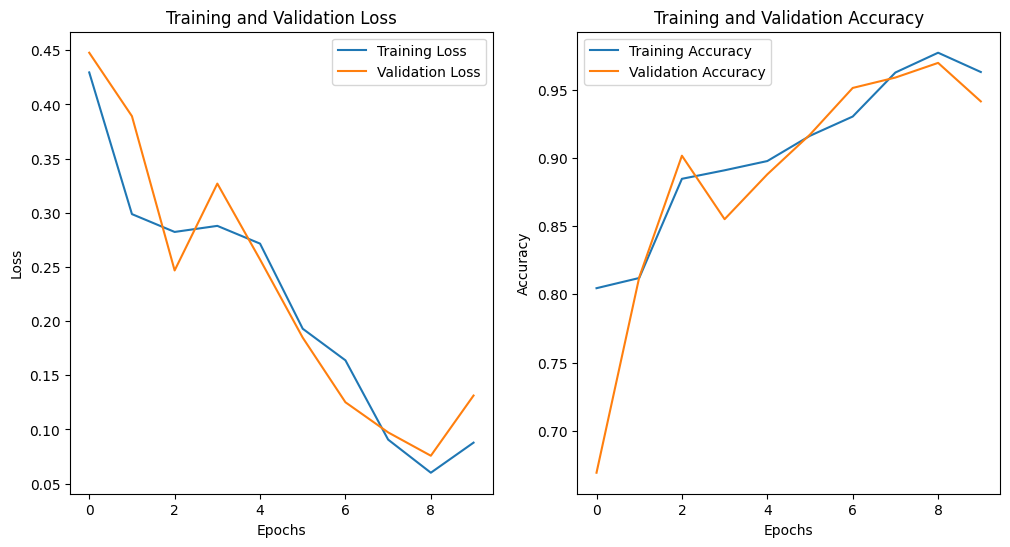

In [73]:
# Plot detailed training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [74]:
#Evaluate the model on the training data
# Evaluate the model
loss, accuracy = model.evaluate(X, Y)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 141s 30s/step - accuracy: 0.9586 - loss: 0.0923
Loss: 0.10066928714513779
Accuracy: 0.9550821185112


In [87]:
# Load new test images
test_image_dir = '/content/drive/MyDrive/Sipakmed_Dataset/Processed_Test/im_Dyskeratotic'  # Directory containing the test images

# Load and preprocess images
test_images = load_images_from_folder(test_image_dir, color_mode='rgb')
preprocessed_test_images = [preprocess_image(img) for img in test_images]

# Convert to numpy array
X_test = np.array(preprocessed_test_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 131s 30s/step


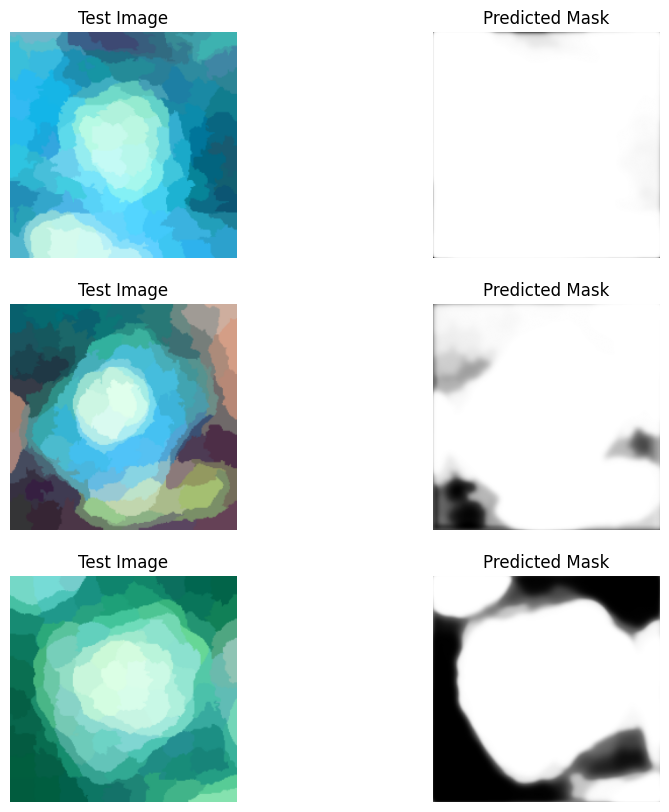

In [89]:
# Predict masks for test images
!pip install tensorflow # Install tensorflow if not already installed
from tensorflow.keras.preprocessing.image import array_to_img # Import array_to_img
import matplotlib.pyplot as plt

predicted_test_masks = model.predict(X_test)

#Visualizations of Predictions

def visualize_predictions(test_images, predicted_masks, num_samples=3):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(array_to_img(test_images[i]))  # Now array_to_img is defined
        plt.title("Test Image")
        plt.axis('off')

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')
    plt.show()

visualize_predictions(preprocessed_test_images, predicted_test_masks)

4/4 ━━━━━━━━━━━━━━━━━━━━ 135s 30s/step


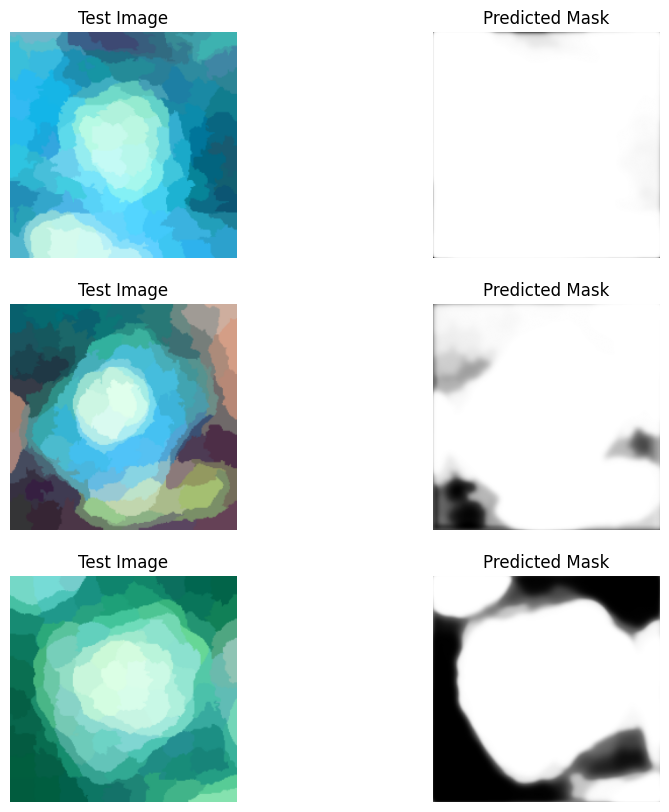

In [90]:
# Predict masks for test images
predicted_test_masks = model.predict(X_test)

#Visualizations of Predictions

def visualize_predictions(test_images, predicted_masks, num_samples=3):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(array_to_img(test_images[i]))
        plt.title("Test Image")
        plt.axis('off')

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')
    plt.show()

visualize_predictions(preprocessed_test_images, predicted_test_masks)

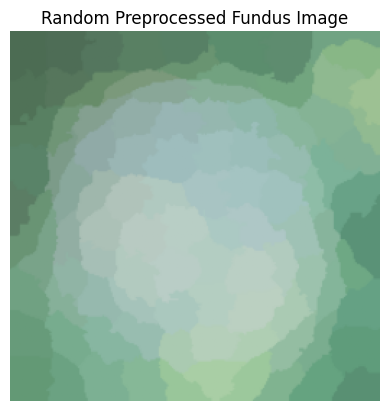

In [92]:
# Visualizing a Random Image
import matplotlib.pyplot as plt
import random # Import the random module

# Select a random image
random_index = random.randint(0, len(preprocessed_images) - 1)
random_image = preprocessed_images[random_index]

# Visualize the random image
plt.imshow(random_image)
plt.title("Random Preprocessed Fundus Image")
plt.axis('off')
plt.show()

In [95]:
# Function to display multiple random images
def display_random_images(images, n=5):
    if len(images) == 0:
        print("No images found in the directory.")
        return

    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        # Ensure random index is within the bounds of the images list
        random_index = random.randint(0, len(images) - 1)
        random_image = images[random_index]
        plt.imshow(random_image)
        plt.axis('off')
    plt.show()

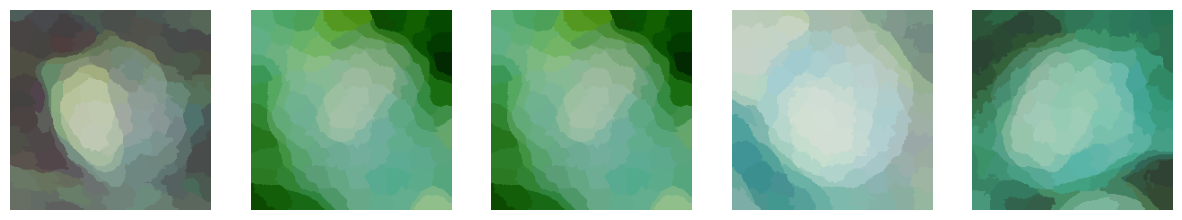

In [97]:
# Set the path to the directory containing the fundus images
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset/Processed_Test/im_Dyskeratotic'  # Verify this path

# Load images, handle potential errors
images = load_images_from_folder(image_dir)

# Check if images were loaded
if len(images) > 0:
    display_random_images(images)
else:
    print("No images were loaded. Please check the image directory path.")

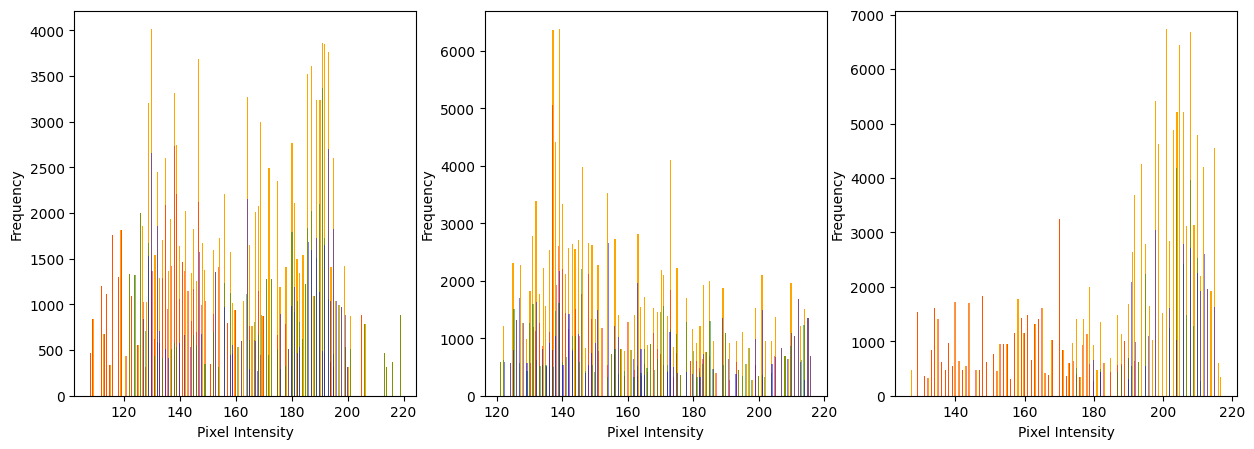

In [98]:
# Display histograms of pixel intensities
#Histograms of Pixel Intensities: Showing the distribution of pixel intensities for random images, including separate histograms for each color channel.
display_histograms(images)

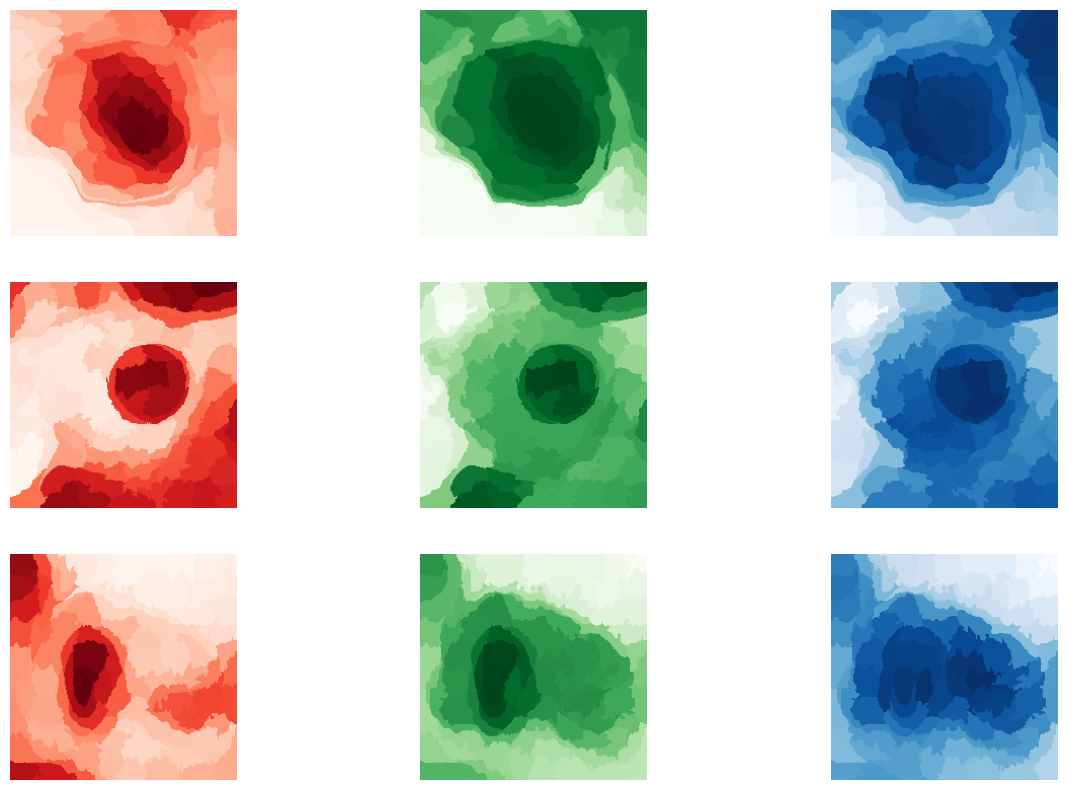

In [99]:
#Displaying color channels separately
#Color Channels: Display the red, green, and blue channels of random images separately.
display_color_channels(images)

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny_edge_detection_pap_smear(images):
    """
    Apply Canny edge detection to highlight cell structures in Pap smear images.

    Parameters:
    images (list of numpy arrays): List of Pap smear images in BGR format.
    """
    if not images or len(images) == 0:
        print("No images found to process.")
        return

    plt.figure(figsize=(10, 10))

    for i, img in enumerate(images):
        if img is None:
            print(f"Skipping image {i} as it is None.")
            continue

        print(f"Processing image {i} with shape: {img.shape}")

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian Blur to reduce noise
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply Canny edge detection
        edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

        # Display original and processed images
        plt.subplot(len(images), 2, i * 2 + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Pap Smear Image")
        plt.axis("off")

        plt.subplot(len(images), 2, i * 2 + 2)
        plt.imshow(edges, cmap='gray')
        plt.title("Canny Edge Detection")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def highlight_blood_vessels(images):
    """
    Extract and highlight blood vessels from fundus images using color thresholding.

    Parameters:
    images (list of numpy arrays): List of fundus images in BGR format.
    """
    if not images or len(images) == 0:
        print("No images found to process.")
        return

    plt.figure(figsize=(10, 10))

    for i, img in enumerate(images):
        if img is None:
            print(f"Skipping image {i} as it is None.")
            continue

        print(f"Processing image {i} with shape: {img.shape}")

        # Convert to grayscale (Use the Green channel)
        green_channel = img[:, :, 1]  # Extract Green channel

        # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced = clahe.apply(green_channel)

        # Apply adaptive thresholding to extract vessels
        vessels = cv2.adaptiveThreshold(
            enhanced, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10
        )

        # Morphological operations to clean up small noise
        kernel = np.ones((2, 2), np.uint8)
        vessels_cleaned = cv2.morphologyEx(vessels, cv2.MORPH_OPEN, kernel, iterations=1)

        # Display original and processed images
        plt.subplot(len(images), 2, i * 2 + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Fundus Image")
        plt.axis("off")

        plt.subplot(len(images), 2, i * 2 + 2)
        plt.imshow(vessels_cleaned, cmap='gray')
        plt.title("Highlighted Blood Vessels")
        plt.axis("off")

    plt.tight_layout()
    plt.show()
